In [1]:
import os
import sys
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("Solarize_Light2")
%matplotlib inline

In [2]:
import pandas as pd

telemetry = pd.read_csv('PdM_telemetry.csv')
errors = pd.read_csv('PdM_errors.csv')
maint = pd.read_csv('PdM_maint.csv')
failures = pd.read_csv('PdM_failures.csv')
machines = pd.read_csv('PdM_machines.csv')

In [3]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

errors['datetime'] = pd.to_datetime(errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('category')

maint['datetime'] = pd.to_datetime(maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('category')

machines['model'] = machines['model'].astype('category')

failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

In [4]:
# Son 3 saatlik gecikme penceresi için telemetri özellikleri üzerinde yeniden örnekleme Min
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                        values=col).resample('3H', closed='left', label='right').min().unstack())

telemetry_min_3h = pd.concat(temp, axis=1)
telemetry_min_3h.columns = [i + '_min_3h' for i in fields]
telemetry_min_3h.reset_index(inplace=True)

telemetry_min_3h.head()

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h
0,1,2015-01-01 09:00:00,162.879223,402.747490,75.237905,34.178847
1,1,2015-01-01 12:00:00,157.610021,346.149335,95.927042,25.990511
2,1,2015-01-01 15:00:00,156.556031,398.648781,101.001083,35.482009
3,1,2015-01-01 18:00:00,160.263954,382.483543,96.480976,38.543681
4,1,2015-01-01 21:00:00,153.353492,402.461187,86.012440,39.739883


In [5]:
# Son 3 saatlik gecikme penceresi için telemetri özellikleri üzerinde yeniden örnekleme Max
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                        values=col).resample('3H', closed='left', label='right').max().unstack())

telemetry_max_3h = pd.concat(temp, axis=1)
telemetry_max_3h.columns = [i + '_max_3h' for i in fields]
telemetry_max_3h.reset_index(inplace=True)

telemetry_max_3h.head()

,machineID,datetime,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h
0,1,2015-01-01 09:00:00,176.217853,527.349825,113.077935,45.087686
1,1,2015-01-01 12:00:00,172.504839,435.376873,111.886648,41.122144
2,1,2015-01-01 15:00:00,175.324524,499.071623,111.755684,45.482287
3,1,2015-01-01 18:00:00,169.218423,460.850670,104.848230,42.675800
4,1,2015-01-01 21:00:00,182.739113,490.672921,93.484954,44.108554


In [6]:
# Son 3 saatlik gecikme penceresi için telemetri özellikleri üzerinde yeniden örnekleme ortalama değerler
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                        values=col).resample('3H', closed='left', label='right').mean().unstack())

telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + '_mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

,machineID,datetime,volt_mean_3h,rotate_mean_3h,pressure_mean_3h,vibration_mean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [7]:
# Son 3 saatlik gecikme penceresi için telemetri özellikleri üzerinde yeniden örnekleme standart sapma
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                        values=col).resample('3H', closed='left', label='right').std().unstack())

telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + '_sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_sd_3h.head()

,machineID,datetime,volt_sd_3h,rotate_sd_3h,pressure_sd_3h,vibration_sd_3h
0,1,2015-01-01 09:00:00,6.721032,67.849599,18.934956,5.874970
1,1,2015-01-01 12:00:00,7.596570,50.120452,8.555032,7.662229
2,1,2015-01-01 15:00:00,10.124584,55.084734,5.909721,5.169304
3,1,2015-01-01 18:00:00,4.673269,42.047278,4.554047,2.106108
4,1,2015-01-01 21:00:00,14.752132,47.048609,4.244158,2.207884


In [8]:
#Son 24 saatlik gecikme penceresi için telemetri özellikleri üzerinde minimum değeri hesaplama

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
        temp.append(pd.pivot_table(telemetry,  index='datetime',
                                               columns='machineID',
                                    values=col).rolling(window=24,center=False).min().resample('3H',
                                                                    closed='left', 
                                                                label='right').first().unstack())                                                                                

        
telemetry_min_24h = pd.concat(temp, axis=1)       
telemetry_min_24h.columns = [i + '_min_24h' for i in fields]
telemetry_min_24h.reset_index(inplace=True)
telemetry_min_24h = telemetry_min_24h.loc[-telemetry_min_24h['volt_min_24h'].isnull()]


telemetry_min_24h.head(10)

,machineID,datetime,volt_min_24h,rotate_min_24h,pressure_min_24h,vibration_min_24h
7,1,2015-01-02 06:00:00,151.335682,346.149335,75.237905,25.990511
8,1,2015-01-02 09:00:00,151.335682,346.149335,75.237905,25.990511
9,1,2015-01-02 12:00:00,147.300678,382.483543,78.880780,25.990511
10,1,2015-01-02 15:00:00,147.300678,382.483543,78.880780,29.527665
11,1,2015-01-02 18:00:00,147.300678,382.483543,78.880780,29.527665
12,1,2015-01-02 21:00:00,145.248486,384.645962,78.880780,29.527665
13,1,2015-01-03 00:00:00,140.776309,384.645962,78.880780,29.527665
14,1,2015-01-03 03:00:00,140.776309,384.645962,78.880780,29.527665
15,1,2015-01-03 06:00:00,140.776309,384.645962,80.668287,29.527665
16,1,2015-01-03 09:00:00,140.776309,384.645962,80.668287,30.665184


In [9]:
# Telemetri özellikleri için son 24 saatlik gecikme penceresi üzerinde maksimum değeri hesapla

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
        temp.append(pd.pivot_table(telemetry,  index='datetime',
                                               columns='machineID',
                                values=col).rolling(window=24,center=False).max().resample('3H', 
                                                                                    closed='left', 
                                                                    label='right').first().unstack())                                                                                

        
telemetry_max_24h = pd.concat(temp, axis=1)       
telemetry_max_24h.columns = [i + '_max_24h' for i in fields]
telemetry_max_24h.reset_index(inplace=True)
telemetry_max_24h = telemetry_max_24h.loc[-telemetry_max_24h['volt_max_24h'].isnull()]
telemetry_max_24h.head(10)

,machineID,datetime,volt_max_24h,rotate_max_24h,pressure_max_24h,vibration_max_24h
7,1,2015-01-02 06:00:00,200.872430,527.349825,113.077935,52.355876
8,1,2015-01-02 09:00:00,200.872430,527.349825,114.342061,52.355876
9,1,2015-01-02 12:00:00,200.872430,519.452812,114.342061,52.355876
10,1,2015-01-02 15:00:00,200.872430,519.452812,114.342061,52.355876
11,1,2015-01-02 18:00:00,200.872430,519.452812,114.342061,52.355876
12,1,2015-01-02 21:00:00,200.872430,519.452812,127.014498,52.355876
13,1,2015-01-03 00:00:00,200.872430,519.452812,127.014498,52.355876
14,1,2015-01-03 03:00:00,200.872430,519.452812,127.014498,52.355876
15,1,2015-01-03 06:00:00,200.872430,521.837936,127.014498,52.355876
16,1,2015-01-03 09:00:00,194.942847,521.837936,127.014498,52.997327


In [10]:
#Telemetri özellikleri için son 24 saatlik gecikme penceresi üzerinde ortalama değeri 

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
        temp.append(pd.pivot_table(telemetry,  index='datetime',
                                               columns='machineID',
                                    values=col).rolling(window=24,center=False).mean().resample('3H',
                                                                                closed='left', 
                                                            label='right').first().unstack())                                                                                

        
telemetry_mean_24h = pd.concat(temp, axis=1)       
telemetry_mean_24h.columns = [i + '_mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['volt_mean_24h'].isnull()]


telemetry_mean_24h.head(10)


,machineID,datetime,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h
7,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
10,1,2015-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
11,1,2015-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214
12,1,2015-01-02 21:00:00,170.556674,452.267095,98.065860,40.033247
13,1,2015-01-03 00:00:00,168.460525,451.031783,99.273286,38.903462
14,1,2015-01-03 03:00:00,169.772951,447.502464,99.005946,39.389725
15,1,2015-01-03 06:00:00,170.900562,453.864597,100.877342,38.696225
16,1,2015-01-03 09:00:00,169.533156,454.785072,100.050567,39.449734


In [11]:
#Telemetri özellikleri için son 24 saatlik gecikme penceresi üzerinde standart sapma hesapla

temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
        temp.append(pd.pivot_table(telemetry,  index='datetime',
                                               columns='machineID',
                            values=col).rolling(window=24,center=False).std().resample('3H', 
                                                closed='left', label='right').first().unstack())   

telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + '_sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['volt_sd_24h'].isnull()]


telemetry_sd_24h.head(10)


,machineID,datetime,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h
7,1,2015-01-02 06:00:00,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,13.954518,43.490234,8.061653,5.898069
12,1,2015-01-02 21:00:00,14.402740,42.626186,10.408012,5.941890
13,1,2015-01-03 00:00:00,15.513819,40.395881,10.833294,5.737671
14,1,2015-01-03 03:00:00,15.726970,39.648116,11.904700,5.601191
15,1,2015-01-03 06:00:00,15.635083,41.828592,11.326412,5.583521
16,1,2015-01-03 09:00:00,13.995465,40.843882,11.036546,5.561553


In [12]:
#Daha önce oluşturulan özellik setlerinin sütunlarını birleştirme
telemetry_feat = pd.concat([telemetry_min_3h,
                            telemetry_max_3h.iloc[:, 2:6],
                            telemetry_mean_3h.iloc[:, 2:6],
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_min_24h.iloc[:, 2:6],
                            telemetry_max_24h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()

telemetry_feat.head()


,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,...,pressure_max_24h,vibration_max_24h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h
7,1,2015-01-02 06:00:00,158.271400,403.235951,92.439132,32.516838,200.872430,495.777958,96.535487,52.355876,...,113.077935,52.355876,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,160.528861,384.645962,86.944273,29.527665,197.363125,486.459056,114.342061,42.992509,...,114.342061,52.355876,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,147.300678,412.965696,90.711354,34.203042,173.394523,439.579460,110.408985,37.117103,...,114.342061,52.355876,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,152.420775,385.354924,99.506819,30.665184,185.205355,497.840620,105.993247,47.862484,...,114.342061,52.355876,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,145.248486,424.542633,93.743827,37.422272,180.030715,495.376449,111.950587,43.099758,...,114.342061,52.355876,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


In [13]:
telemetry_feat.describe()

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,...,pressure_max_24h,vibration_max_24h,volt_mean_24h,rotate_mean_24h,pressure_mean_24h,vibration_mean_24h,volt_sd_24h,rotate_sd_24h,pressure_sd_24h,vibration_sd_24h
count,291300.00000,291300,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,...,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,2015-07-03 06:00:00,158.071254,404.140202,92.378383,36.147281,183.471584,489.049230,109.347468,44.627779,...,120.628765,50.224220,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065
min,1.00000,2015-01-02 06:00:00,97.333604,138.432075,51.237106,14.877054,134.886496,237.641009,77.169913,28.581727,...,101.486195,41.786127,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.75000,2015-04-03 06:00:00,150.363984,379.505260,86.862285,33.457488,175.270663,463.345990,103.505575,41.788130,...,116.041542,48.051757,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347
50%,50.50000,2015-07-03 06:00:00,158.162633,406.887414,92.115722,36.088251,182.767736,489.171998,108.504936,44.291715,...,119.355064,49.704299,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594
75%,75.25000,2015-10-02 06:00:00,165.835015,432.057742,97.273981,38.666539,190.890580,515.381821,114.005598,47.040101,...,123.330351,51.697676,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480
max,100.00000,2016-01-01 06:00:00,235.726785,565.962115,160.026994,68.001841,255.124717,695.020984,185.951998,76.791072,...,185.951998,76.791072,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783
std,28.86612,NaN,11.871003,40.811111,8.775150,4.206936,11.902916,40.782581,8.856465,4.217137,...,7.247956,3.305991,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820


In [14]:
# Her hata türü için bir sütun oluştur
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

# Belirli bir saatteki belirli bir makine için hataları birleştirin
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
...,...,...,...,...,...,...,...
3611,100,2015-11-12 01:00:00,1,0,0,0,0
3612,100,2015-11-21 08:00:00,0,1,0,0,0
3613,100,2015-12-04 02:00:00,1,0,0,0,0
3614,100,2015-12-08 06:00:00,0,1,1,0,0


In [15]:
# Her hata türü için bir sütun oluşturun.
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

# Belirli bir saatteki belirli bir makine için hataları birleştirin
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count.head()

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0


In [16]:
error_count.describe()

,machineID,datetime,error1,error2,error3,error4,error5
count,3616.000000,3616,3616.000000,3616.00000,3616.000000,3616.000000,3616.000000
mean,51.119192,2015-06-30 23:57:08.761061888,0.279314,0.27323,0.231748,0.201051,0.098451
min,1.000000,2015-01-01 06:00:00,0.000000,0.00000,0.000000,0.000000,0.000000
25%,26.000000,2015-03-29 19:45:00,0.000000,0.00000,0.000000,0.000000,0.000000
50%,52.000000,2015-07-01 06:00:00,0.000000,0.00000,0.000000,0.000000,0.000000
75%,76.000000,2015-10-01 11:15:00,1.000000,1.00000,0.000000,0.000000,0.000000
max,100.000000,2016-01-01 05:00:00,1.000000,1.00000,1.000000,1.000000,1.000000
std,28.870118,NaN,0.448724,0.44568,0.422007,0.400841,0.297965


In [17]:
error_count = telemetry [['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'],
how='left').fillna(0.0)
error_count.head()

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-01 06:00:00,1,0.0,0.0,0.0,0.0,0.0
1,2015-01-01 07:00:00,1,0.0,0.0,0.0,0.0,0.0
2,2015-01-01 08:00:00,1,0.0,0.0,0.0,0.0,0.0
3,2015-01-01 09:00:00,1,0.0,0.0,0.0,0.0,0.0
4,2015-01-01 10:00:00,1,0.0,0.0,0.0,0.0,0.0


In [18]:
temp = []
fields = ['error%d' % i for i in range(1,6)]
fields


['error1', 'error2', 'error3', 'error4', 'error5']

In [19]:
for col in fields:
    temp.append(pd.pivot_table(error_count,index='datetime',columns='machineID',values=col).rolling(window=24).sum().resample('3H', closed='left', label='right').first().unstack())


error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)#To be activate
error_count = error_count.dropna()
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [20]:
error_count.describe()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,2015-07-03 07:30:00,0.027649,0.027069,0.022907,0.019904,0.009753
min,1.00000,2015-01-02 06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,2015-04-03 06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,2015-07-03 07:30:00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,2015-10-02 09:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2016-01-01 09:00:00,2.000000,2.000000,2.000000,2.000000,2.000000
std,28.86612,NaN,0.166273,0.164429,0.151453,0.140820,0.098797


In [22]:
import numpy as np
from tqdm.notebook import tqdm_notebook

# Her bakım türü için bir sütun oluşturun
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# Belirli bir saatteki belirli bir makine için tamirleri birleştirin
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# Değiştirilen bileşen olmayan zaman noktalarını ekleyin
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                    on=['datetime', 'machineID'],
                                     how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])


components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in tqdm_notebook(components):
    # Belirteçleri bileşen değişiminin en son tarihine dönüştürün
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(),'datetime']
    
    # Bileşen değişiminin en son tarihini önden dolduru
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

# 2014 tarihlerini kaldırın (NaN veya gelecekteki bileşen değişim tarihleri olabilir)    
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

# En son bileşen değişiminin tarihini, en son bileşen değişiminden bu yana geçen günlerle değiştirin.
for comp in tqdm_notebook(components):
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')
    
comp_rep.describe()

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\admin\AppData\Local\Temp\ipykernel_18968\2805272323.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2014-12-13 06:00:00', '2015-01-05 06:00:00', '2015-01-20 06:00:00',
 '2015-03-06 06:00:00', '2015-03-21 06:00:00', '2015-06-19 06:00:00',
 '2015-07-19 06:00:00', '2015-08-03 06:00:00', '2015-09-02 06:00:00',
 '2015-10-02 06:00:00',
 ...
 '2014-09-14 06:00:00', '2015-02-12 06:00:00', '2015-03-14 06:00:00',
 '2015-03-29 06:00:00', '2015-04-13 06:00:00', '2015-04-28 06:00:00',
 '2015-07-27 06:00:00', '2015-09-10 06:00:00', '2015-09-25 06:00:00',
 '2015-10-10 06:00:00']
Length: 804, dtype: datetime64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(),'datetime']
C:\Users\admin\AppData\Local\Temp\ipykernel_18968\2805272323.py:24: FutureWarning: Series.fillna with

  0%|          | 0/4 [00:00<?, ?it/s]

,datetime,machineID,comp1,comp2,comp3,comp4
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,53.525185,51.540806,52.725962,53.834191
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-02 12:00:00,25.750000,13.291667,12.125000,13.125000,13.000000
50%,2015-07-02 18:00:00,50.500000,32.791667,29.666667,32.291667,32.500000
75%,2015-10-02 00:00:00,75.250000,68.708333,66.541667,67.333333,70.458333
max,2016-01-01 06:00:00,100.000000,491.958333,348.958333,370.958333,394.958333
std,NaN,28.866087,62.491679,59.269254,58.873114,59.707978


In [23]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
0,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
1,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
2,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
3,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
4,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


In [24]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())
final_feat.describe()


   machineID            datetime  volt_min_3h  rotate_min_3h  pressure_min_3h  \
0          1 2015-01-02 06:00:00   158.271400     403.235951        92.439132   
1          1 2015-01-02 09:00:00   160.528861     384.645962        86.944273   
2          1 2015-01-02 12:00:00   147.300678     412.965696        90.711354   
3          1 2015-01-02 15:00:00   152.420775     385.354924        99.506819   
4          1 2015-01-02 18:00:00   145.248486     424.542633        93.743827   

   vibration_min_3h  volt_max_3h  rotate_max_3h  pressure_max_3h  \
0         32.516838   200.872430     495.777958        96.535487   
1         29.527665   197.363125     486.459056       114.342061   
2         34.203042   173.394523     439.579460       110.408985   
3         30.665184   185.205355     497.840620       105.993247   
4         37.422272   180.030715     495.376449       111.950587   

   vibration_max_3h  ...  error2count  error3count  error4count  error5count  \
0         52.355876  ...

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291300.00000,291300,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,...,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,2015-07-03 06:00:00,158.071254,404.140202,92.378383,36.147281,183.471584,489.049230,109.347468,44.627779,...,0.027659,0.027075,0.022901,0.019907,0.009756,53.350748,51.318963,52.512108,53.619118,11.330000
min,1.00000,2015-01-02 06:00:00,97.333604,138.432075,51.237106,14.877054,134.886496,237.641009,77.169913,28.581727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,2015-04-03 06:00:00,150.363984,379.505260,86.862285,33.457488,175.270663,463.345990,103.505575,41.788130,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,6.750000
50%,50.50000,2015-07-03 06:00:00,158.162633,406.887414,92.115722,36.088251,182.767736,489.171998,108.504936,44.291715,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.25000,2015-10-02 06:00:00,165.835015,432.057742,97.273981,38.666539,190.890580,515.381821,114.005598,47.040101,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,100.00000,2016-01-01 06:00:00,235.726785,565.962115,160.026994,68.001841,255.124717,695.020984,185.951998,76.791072,...,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000
std,28.86612,NaN,11.871003,40.811111,8.775150,4.206936,11.902916,40.782581,8.856465,4.217137,...,0.166301,0.164446,0.151435,0.140832,0.098813,62.418063,59.140743,58.765904,59.606886,5.827625


In [25]:
final_feat.columns

Index(['machineID', 'datetime', 'volt_min_3h', 'rotate_min_3h',
       'pressure_min_3h', 'vibration_min_3h', 'volt_max_3h', 'rotate_max_3h',
       'pressure_max_3h', 'vibration_max_3h', 'volt_mean_3h', 'rotate_mean_3h',
       'pressure_mean_3h', 'vibration_mean_3h', 'volt_sd_3h', 'rotate_sd_3h',
       'pressure_sd_3h', 'vibration_sd_3h', 'volt_min_24h', 'rotate_min_24h',
       'pressure_min_24h', 'vibration_min_24h', 'volt_max_24h',
       'rotate_max_24h', 'pressure_max_24h', 'vibration_max_24h',
       'volt_mean_24h', 'rotate_mean_24h', 'pressure_mean_24h',
       'vibration_mean_24h', 'volt_sd_24h', 'rotate_sd_24h', 'pressure_sd_24h',
       'vibration_sd_24h', 'error1count', 'error2count', 'error3count',
       'error4count', 'error5count', 'comp1', 'comp2', 'comp3', 'comp4',
       'model', 'age'],
      dtype='object')

In [26]:
labeled_features = final_feat.merge(failures, on=['datetime', 'machineID'], how='left')

labeled_features = labeled_features.bfill(axis=1, limit=7)

labeled_features = labeled_features.fillna('none')
labeled_features.head()

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-02 06:00:00,158.271400,403.235951,92.439132,32.516838,200.872430,495.777958,96.535487,52.355876,...,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18,none
1,1,2015-01-02 09:00:00,160.528861,384.645962,86.944273,29.527665,197.363125,486.459056,114.342061,42.992509,...,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18,none
2,1,2015-01-02 12:00:00,147.300678,412.965696,90.711354,34.203042,173.394523,439.579460,110.408985,37.117103,...,0.0,0.0,0.0,20.250,215.250,155.250,170.250,model3,18,none
3,1,2015-01-02 15:00:00,152.420775,385.354924,99.506819,30.665184,185.205355,497.840620,105.993247,47.862484,...,0.0,0.0,0.0,20.375,215.375,155.375,170.375,model3,18,none
4,1,2015-01-02 18:00:00,145.248486,424.542633,93.743827,37.422272,180.030715,495.376449,111.950587,43.099758,...,0.0,0.0,0.0,20.500,215.500,155.500,170.500,model3,18,none


In [27]:
labeled_features.loc[labeled_features['failure'] == 'comp3'][:16]

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
29516,11,2015-02-19 06:00:00,154.244801,420.918836,125.994607,37.162347,177.732452,495.388259,130.005457,43.294359,...,0.0,1.0,0.0,218.0,30.0,0.0,15.0,model2,6,comp3
29997,11,2015-04-20 06:00:00,156.910149,310.970074,124.982065,40.386116,185.610969,401.748684,138.548132,47.970666,...,1.0,1.0,0.0,278.0,0.0,0.0,15.0,model2,6,comp3
31317,11,2015-10-02 06:00:00,164.915331,439.490865,115.101256,33.848465,169.075579,491.630618,126.301438,43.913863,...,0.0,1.0,0.0,45.0,15.0,0.0,30.0,model2,6,comp3
31917,11,2015-12-16 06:00:00,164.045347,296.663979,118.645252,41.066223,192.643908,427.038662,137.393275,44.897744,...,0.0,1.0,0.0,15.0,90.0,0.0,30.0,model2,6,comp3
35752,13,2015-04-11 06:00:00,133.695839,391.850409,116.212314,36.579725,189.395066,431.026643,137.135817,49.958484,...,0.0,1.0,1.0,15.0,45.0,0.0,0.0,model1,15,comp3
36233,13,2015-06-10 06:00:00,173.882141,343.428922,107.790327,43.728714,189.329758,495.827278,122.612909,45.185757,...,0.0,1.0,0.0,75.0,0.0,0.0,30.0,model1,15,comp3
36834,13,2015-08-24 06:00:00,155.981803,398.956404,155.168727,29.636473,206.378435,482.750684,171.176055,40.453102,...,0.0,1.0,0.0,0.0,15.0,0.0,30.0,model1,15,comp3
44184,16,2015-03-03 06:00:00,167.554723,399.704902,116.730979,39.205664,170.476797,492.013465,146.893154,40.792138,...,0.0,1.0,0.0,45.0,30.0,0.0,15.0,model1,3,comp3
44784,16,2015-05-17 06:00:00,153.044626,348.474831,123.695909,39.251103,168.030660,444.363409,140.246367,46.736859,...,0.0,1.0,0.0,15.0,60.0,0.0,30.0,model1,3,comp3
45145,16,2015-07-01 06:00:00,173.903528,386.637045,124.406570,33.789087,188.869183,422.701818,132.283048,35.376664,...,1.0,1.0,0.0,15.0,0.0,0.0,75.0,model1,3,comp3


In [30]:
labeled_features.head

<bound method NDFrame.head of         machineID            datetime  volt_min_3h  rotate_min_3h  \
0               1 2015-01-02 06:00:00   158.271400     403.235951   
1               1 2015-01-02 09:00:00   160.528861     384.645962   
2               1 2015-01-02 12:00:00   147.300678     412.965696   
3               1 2015-01-02 15:00:00   152.420775     385.354924   
4               1 2015-01-02 18:00:00   145.248486     424.542633   
...           ...                 ...          ...            ...   
291336        100 2015-12-31 18:00:00   164.729171     388.490938   
291337        100 2015-12-31 21:00:00   138.506098     360.053876   
291338        100 2016-01-01 00:00:00   152.182033     414.011630   
291339        100 2016-01-01 03:00:00   162.742669     395.222827   
291340        100 2016-01-01 06:00:00   165.475310     413.771670   

        pressure_min_3h  vibration_min_3h  volt_max_3h  rotate_max_3h  \
0             92.439132         32.516838   200.872430     495.77795

In [31]:
labeled_features.to_csv('preprocessed_2.csv', encoding='utf-8', index=False)

### Model Oluşturma

In [32]:
import pandas as pd
labeled_features= pd.read_csv("preprocessed_2.csv")

labeled_features['datetime'] = pd.to_datetime(labeled_features['datetime'], format="%Y-%m-%d %H:%M:%S")

In [33]:
labeled_features.info

<bound method DataFrame.info of         machineID            datetime  volt_min_3h  rotate_min_3h  \
0               1 2015-01-02 06:00:00   158.271400     403.235951   
1               1 2015-01-02 09:00:00   160.528861     384.645962   
2               1 2015-01-02 12:00:00   147.300678     412.965696   
3               1 2015-01-02 15:00:00   152.420775     385.354924   
4               1 2015-01-02 18:00:00   145.248486     424.542633   
...           ...                 ...          ...            ...   
291336        100 2015-12-31 18:00:00   164.729171     388.490938   
291337        100 2015-12-31 21:00:00   138.506098     360.053876   
291338        100 2016-01-01 00:00:00   152.182033     414.011630   
291339        100 2016-01-01 03:00:00   162.742669     395.222827   
291340        100 2016-01-01 06:00:00   165.475310     413.771670   

        pressure_min_3h  vibration_min_3h  volt_max_3h  rotate_max_3h  \
0             92.439132         32.516838   200.872430     495.777

In [34]:
labeled_features.tail(2)

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
291339,100,2016-01-01 03:00:00,162.742669,395.222827,101.589735,44.382754,179.438162,481.253908,103.158233,50.771941,...,0.0,0.0,0.0,82.875,7.875,82.875,52.875,model4,5,none
291340,100,2016-01-01 06:00:00,165.475310,413.771670,94.132837,35.123072,192.483414,447.816524,104.081073,48.314561,...,0.0,0.0,0.0,83.000,8.000,83.000,53.000,model4,5,none


In [35]:
labeled_features.describe()

,machineID,datetime,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291341.000000,291341,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,...,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000
mean,50.499243,2015-07-03 05:59:11.067649792,158.072427,404.132559,92.380133,36.147905,183.473297,489.041432,109.348749,44.628544,...,0.027724,0.027164,0.022990,0.019949,0.009837,53.350081,51.314525,52.510320,53.614339,11.330321
min,1.000000,2015-01-02 06:00:00,97.333604,138.432075,51.237106,14.877054,134.886496,237.641009,77.169913,28.581727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2015-04-03 06:00:00,150.364806,379.495414,86.862934,33.457547,175.271243,463.339007,103.505650,41.788281,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,7.000000
50%,50.000000,2015-07-03 06:00:00,158.163452,406.881373,92.116192,36.088485,182.768621,489.167126,108.505559,44.292088,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,75.000000,2015-10-02 06:00:00,165.836186,432.055945,97.275210,38.667060,190.893051,515.379948,114.006260,47.041124,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,100.000000,2016-01-01 06:00:00,235.726785,565.962115,160.026994,68.001841,255.124717,695.020984,185.951998,76.791072,...,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000
std,28.866522,NaN,11.872268,40.817688,8.777961,4.207675,11.904876,40.789312,8.858979,4.218082,...,0.166505,0.164701,0.151716,0.140975,0.099214,62.422314,59.140184,58.764991,59.605785,5.827532


In [36]:
labeled_features.to_csv('preprocessed_son.csv', encoding='utf-8', index=False)

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [41]:
X = labeled_features.drop(['datetime', 'machineID', 'failure'], axis=1)

In [42]:
X.head(2)

,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,volt_mean_3h,rotate_mean_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,158.271400,403.235951,92.439132,32.516838,200.872430,495.777958,96.535487,52.355876,180.133784,440.608320,...,0.0,0.0,0.0,0.0,20.000,215.000,155.000,170.000,model3,18
1,160.528861,384.645962,86.944273,29.527665,197.363125,486.459056,114.342061,42.992509,176.364293,439.349655,...,0.0,0.0,0.0,0.0,20.125,215.125,155.125,170.125,model3,18


In [43]:
X_final = pd.get_dummies(X)
X_final.head(2)

,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,volt_mean_3h,rotate_mean_3h,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
0,158.271400,403.235951,92.439132,32.516838,200.872430,495.777958,96.535487,52.355876,180.133784,440.608320,...,0.0,20.000,215.000,155.000,170.000,18,False,False,True,False
1,160.528861,384.645962,86.944273,29.527665,197.363125,486.459056,114.342061,42.992509,176.364293,439.349655,...,0.0,20.125,215.125,155.125,170.125,18,False,False,True,False


In [44]:
X_final.describe()

,volt_min_3h,rotate_min_3h,pressure_min_3h,vibration_min_3h,volt_max_3h,rotate_max_3h,pressure_max_3h,vibration_max_3h,volt_mean_3h,rotate_mean_3h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,...,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000,291341.000000
mean,158.072427,404.132559,92.380133,36.147905,183.473297,489.041432,109.348749,44.628544,170.772904,446.605411,...,0.027724,0.027164,0.022990,0.019949,0.009837,53.350081,51.314525,52.510320,53.614339,11.330321
std,11.872268,40.817688,8.777961,4.207675,11.904876,40.789312,8.858979,4.218082,9.498823,33.131243,...,0.166505,0.164701,0.151716,0.140975,0.099214,62.422314,59.140184,58.764991,59.605785,5.827532
min,97.333604,138.432075,51.237106,14.877054,134.886496,237.641009,77.169913,28.581727,125.532506,211.811184,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.364806,379.495414,86.862934,33.457547,175.271243,463.339007,103.505650,41.788281,164.446156,427.562122,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.000000,13.000000,12.875000,7.000000
50%,158.163452,406.881373,92.116192,36.088485,182.768621,489.167126,108.505559,44.292088,170.431738,448.381061,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.625000,29.500000,32.125000,32.375000,12.000000
75%,165.836186,432.055945,97.275210,38.667060,190.893051,515.379948,114.006260,47.041124,176.608355,468.444174,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.500000,66.250000,67.000000,70.125000,16.000000
max,235.726785,565.962115,160.026994,68.001841,255.124717,695.020984,185.951998,76.791072,241.420717,586.682904,...,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


In [45]:
X_final_train = X_final.values
X_final_train[1]

array([160.528860515505, 384.645961639767, 86.9442726860067,
       29.5276645184185, 197.363124535674, 486.459056124098,
       114.342060814369, 42.9925094428893, 176.36429322251965,
       439.3496550183961, 101.55320892489958, 36.105580032752606,
       18.95221003870771, 51.32963577178207, 13.789279490275034,
       6.737739190623299, 151.335682229837, 346.149335043074,
       75.2379048586662, 25.9905109982024, 200.872429816452,
       527.349825452291, 114.342060814369, 52.3558761423939,
       170.6148618757748, 446.3648591463823, 96.84978485167947,
       39.73682577058889, 12.519402246698128, 48.385075882399256,
       10.171539786051593, 6.163230823409215, 0.0, 0.0, 0.0, 0.0, 0.0,
       20.125, 215.125, 155.125, 170.125, 18, False, False, True, False],
      dtype=object)

In [46]:
y_final=labeled_features['failure']
y_final.head(2)

0    none
1    none
Name: failure, dtype: object

In [47]:
y_final_train = y_final.values
y_final_train[1]

'none'

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_final_train, y_final_train,test_size=0.20, shuffle=False)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, shuffle=False)

In [49]:
print('X_train Observations: %d' % (len(X_train)))
print('y_train Observations: %d' % (len(y_train)))

print('X_cv Observations: %d' % (len(X_cv)))
print('y_cv Observations: %d' % (len(y_cv)))

print('X_test Observations: %d' % (len(X_test)))
print('y_test Observations: %d' % (len(y_test)))

X_train Observations: 186457
y_train Observations: 186457
X_cv Observations: 46615
y_cv Observations: 46615
X_test Observations: 58269
y_test Observations: 58269


In [50]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = ['comp1', 'comp2', 'comp3', 'comp4', 'none']
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [51]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

x_cfl=XGBClassifier()
x_cfl.fit(X_train,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

-------------------- Confusion matrix --------------------


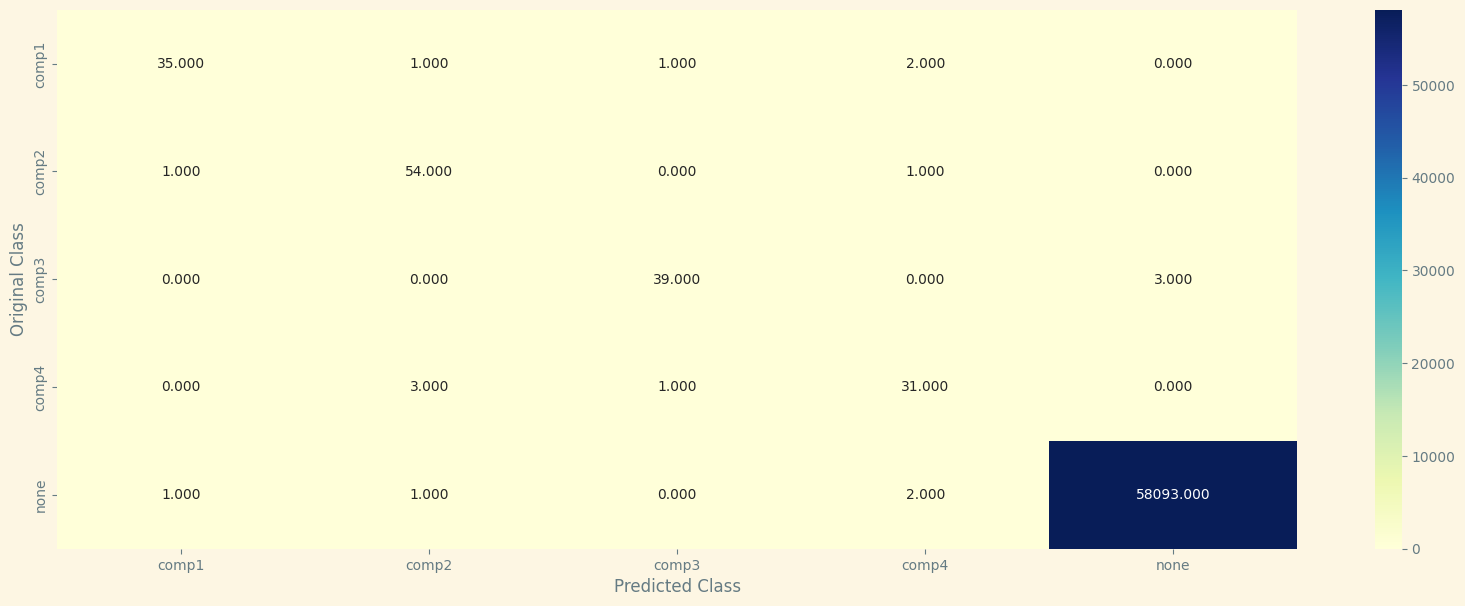

-------------------- Precision matrix (Columm Sum=1) --------------------


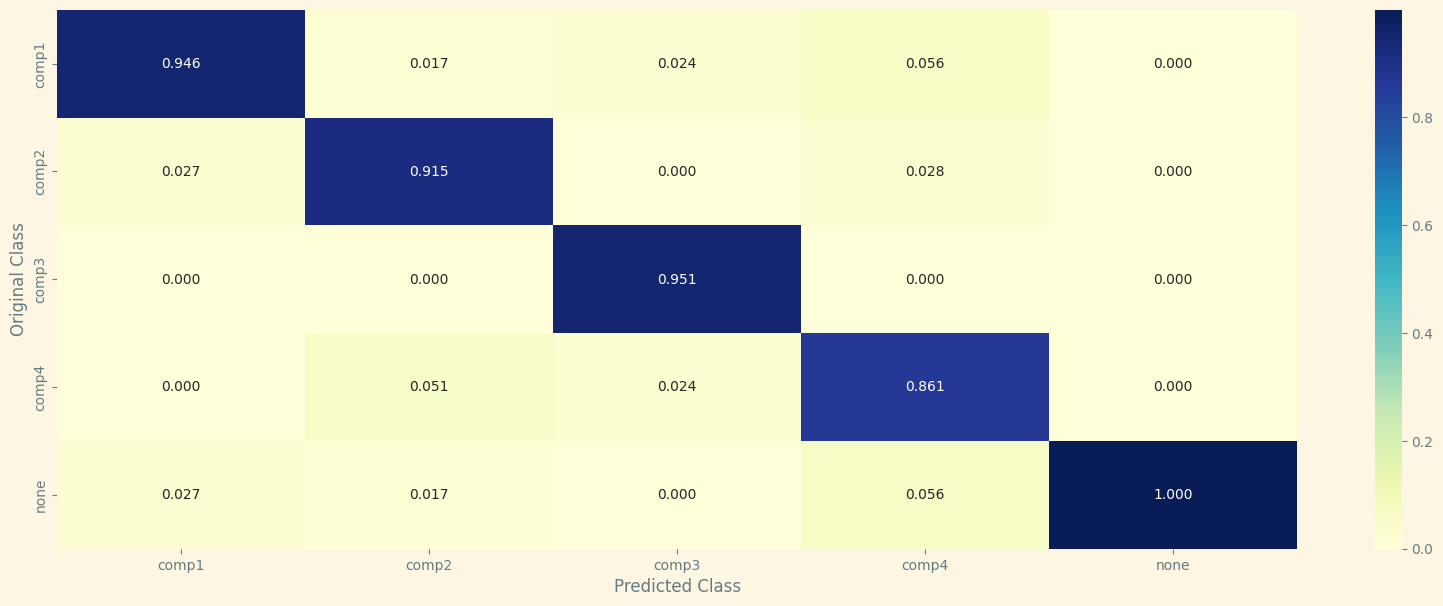

-------------------- Recall matrix (Row sum=1) --------------------


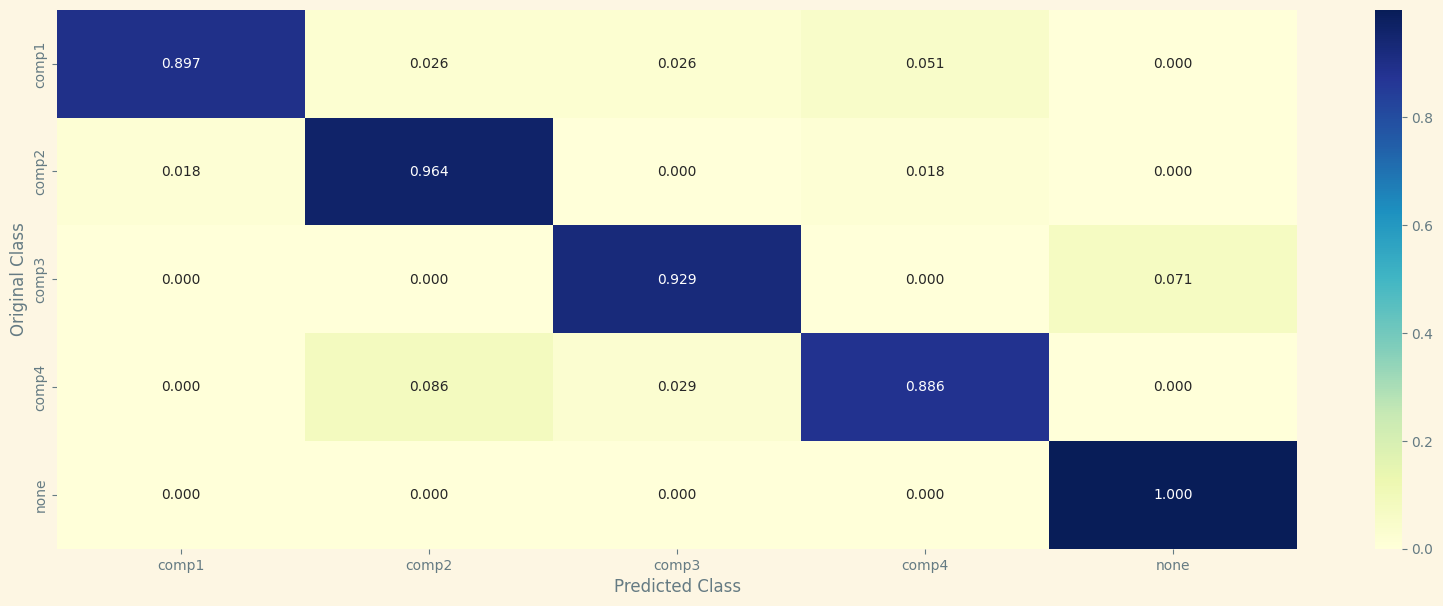

In [52]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
plot_confusion_matrix(y_test_encoded, x_cfl.predict(X_test))